In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import validation_curve
from sklearn import model_selection, linear_model
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns


In [2]:
test_data = pd.read_csv("C:\\Users\\10\\test.csv")
train_data = pd.read_csv("C:\\Users\\10\\train.csv") 

In [3]:
train_data.shape # print the dimension or shape of train data


(42000, 785)

In [4]:
test_data.shape # print the dimension or shape of test data


(28000, 784)

In [5]:
train_data.head() # printing first five columns of train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_data.head() # printing first five columns of test_data


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:

# dimensions
print("Dimensions: ",test_data.shape, "\n")

# data types
print(test_data.info())

# head
test_data.head()

Dimensions:  (28000, 784) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:

# dimensions
print("Dimensions: ",train_data.shape, "\n")

# data types
print(train_data.info())

# head
train_data.head()

Dimensions:  (42000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Text(0.5, 1.0, 'Digit 4')

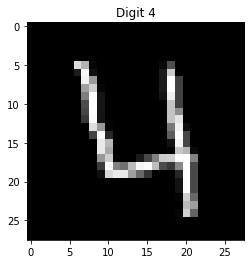

In [10]:
# Plotting some samples as well as converting into matrix

four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

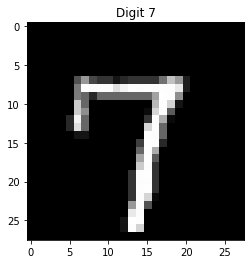

In [11]:
seven = train_data.iloc[6, 1:]
seven.shape
seven = seven.values.reshape(28, 28)
plt.imshow(seven, cmap='gray')
plt.title("Digit 7")

In [12]:
round(train_data.drop('label', axis=1).mean(), 2)


pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [13]:
y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)

(42000, 785)


In [14]:
X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (42000, 784)
test_data: (28000, 784)


In [15]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

In [16]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
model_linear.score(X_test, y_test)

# predict
y_pred = model_linear.predict(X_test)

In [17]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [22]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,22.618240,0.688217,5.186308,0.102607,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,5.124540,1.144597,2.332818,0.695484,5,0.001,"{'C': 5, 'gamma': 0.001}",0.936310,0.945238,0.946429,...,0.944524,0.004508,2,0.996875,0.996577,0.996429,0.996875,0.996280,0.996607,0.000238
2,5.420239,0.707591,3.108406,0.203371,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.914286,0.925595,0.922024,...,0.922976,0.007169,4,0.950446,0.950893,0.950000,0.947768,0.947619,0.949345,0.001379
3,31.365372,11.470183,8.152579,3.596224,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755357,0.757143,0.779167,...,0.766667,0.011536,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,9.626183,0.047144,6.328239,0.164485,10,0.001,"{'C': 10, 'gamma': 0.001}",0.933929,0.945238,0.947024,...,0.944881,0.005815,1,0.999405,0.999405,0.999405,0.999405,0.999405,0.999405,0.000000
5,7.587811,0.249637,5.796327,0.039155,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.911310,0.928571,0.927976,...,0.926071,0.009278,3,0.963542,0.964137,0.963839,0.961607,0.959524,0.962530,0.001744


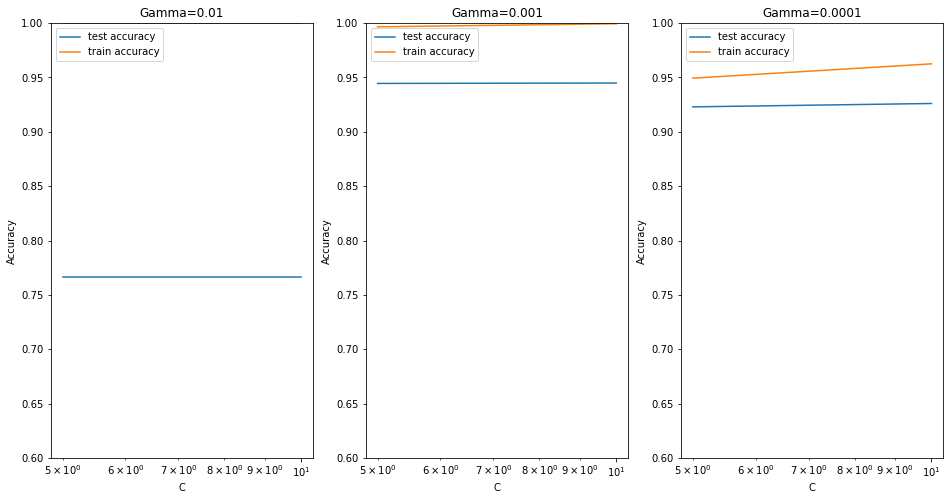

In [23]:
0.001744
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [18]:
from sklearn import metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9133333333333333 

[[1160    0    0    1    6    6   12    1    1    1]
 [   0 1389    3    4    3    0    0    2   12    0]
 [   9   11 1146   38   11    4   10   12   17    2]
 [   5    4   35 1204    0   51    2    3   21    6]
 [   3    3   20    3 1132    1   10    4    2   40]
 [   9   17   10   67    7  997   14    2   19    7]
 [  15    2   15    0    9   15 1160    1    2    0]
 [   5   12   18    9   26    2    1 1212    3   42]
 [   8   31   24   45    8   61    9   14 1002   15]
 [   9    6    7   28   56    3    0   53    7 1106]]


1.0


(Text(0.5, 0, 'Number of iterations'), Text(0, 0.5, 'Training\\Validation'))

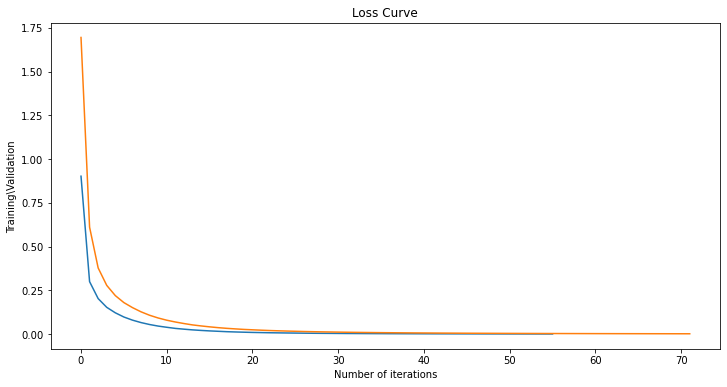

In [24]:
X_tr,X_val,y_tr,y_val=model_selection.train_test_split(X_train,y_train,test_size=0.3)
mlp=MLPClassifier(activation="relu",max_iter=3000)
fig, ax = plt.subplots(1, figsize=(12, 6))
mlp.fit(X_train,y_train)
print (mlp.score(X_train,y_train))
plt.plot(mlp.loss_curve_)
mlp.fit(X_val,y_val)
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Number of iterations"), plt.ylabel("Training\Validation")

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve

y_pred_test= model_linear.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()
plt.legend()